# Natural Language Processing Pipeline with NLTK

In this notebook, we'll build a natural language processing (NLP) pipeline using Python and NLTK. We'll perform sentiment analysis and create a word cloud from a commonly used dataset of movie reviews.

## Steps:
1. Load and explore the dataset
2. Preprocess the text data
3. Perform sentiment analysis
4. Create a word cloud

We'll use the NLTK library for text preprocessing and sentiment analysis, and the WordCloud library to create the word cloud.

In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

In [ ]:
# Download the movie_reviews dataset
nltk.download('movie_reviews')

# Load the movie_reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to ensure randomness
random.shuffle(documents)

# Display the first document (word tokens and category)
print(documents[0])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


(['what', 'is', 'freedom', '?', 'how', 'does', 'one', 'determine', 'who', 'is', 'free', '?', 'in', '1839', ',', 'those', 'questions', 'were', 'more', 'difficult', 'to', 'answer', 'then', 'they', 'are', 'now', '.', 'yet', ',', 'the', 'mistakes', 'of', 'our', 'forefathers', 'must', 'be', 'examined', 'in', 'order', 'to', 'rectify', 'current', 'situations', '.', 'that', 'is', ',', 'in', 'essence', ',', 'what', 'steven', 'spielberg', "'", 's', 'gripping', 'drama', '"', 'amistad', '"', 'is', 'about', '.', 'through', 'its', 'various', 'dramas', ',', 'spielberg', 'presents', 'a', 'case', 'about', 'a', 'group', 'of', 'africans', ',', 'who', ',', 'after', 'being', 'seized', 'from', 'their', 'home', ',', 'were', 'forced', 'onto', 'a', 'ship', 'and', 'sent', 'to', 'the', 'united', 'states', 'aboard', '"', 'la', 'amistad', '"', '.', 'on', 'their', 'way', 'there', ',', 'the', 'slaves', ',', 'led', 'by', 'cinque', '(', 'djimon', 'hounsou', ')', ',', 'rebelled', ',', 'killing', 'off', 'part', 'of', 't

## 2. Preprocess the Text Data

We'll preprocess the text data by converting the words to lowercase, removing stopwords, and performing stemming.

In [ ]:
# Import necessary libraries for preprocessing


# Download the stopwords dataset
nltk.download('stopwords')

# Initialize the stemmer and stopwords list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess the text data
def preprocess(words):
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return words

# Preprocess the documents
documents = [(preprocess(words), category) for words, category in documents]

# Display the first preprocessed document
print(documents[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(['freedom', 'one', 'determin', 'free', 'question', 'difficult', 'answer', 'yet', 'mistak', 'forefath', 'must', 'examin', 'order', 'rectifi', 'current', 'situat', 'essenc', 'steven', 'spielberg', 'grip', 'drama', 'amistad', 'variou', 'drama', 'spielberg', 'present', 'case', 'group', 'african', 'seiz', 'home', 'forc', 'onto', 'ship', 'sent', 'unit', 'state', 'aboard', 'la', 'amistad', 'way', 'slave', 'led', 'cinqu', 'djimon', 'hounsou', 'rebel', 'kill', 'part', 'crew', 'howev', 'ship', 'still', 'direct', 'toward', 'unit', 'state', 'african', 'brought', 'trial', 'murder', 'court', 'variou', 'faction', 'claim', 'ownership', 'slave', 'therefor', 'tri', 'seiz', 'away', 'unit', 'state', 'govern', 'led', 'presid', 'martin', 'van', 'buren', 'nigel', 'hawthorn', 'secretari', 'state', 'secretari', 'forsyth', 'david', 'paymer', 'tri', 'ship', 'african', 'spain', 'year', 'old', 'isabella', 'ii', 'anna', 'paquin', 'want', 'back', 'two', 'spaniard', 'la', 'amistad', 'want', 'slave', 'american', 'shi

## 3. Perform Sentiment Analysis

We'll perform sentiment analysis using a Naive Bayes classifier.

In [ ]:
# Create a frequency distribution of the words
all_words = nltk.FreqDist(word for words, category in documents for word in words)

# Select the top 2000 words as features
word_features = list(all_words)[:2000]

# Function to extract features from the document
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[f'contains({word})'] = (word in document_words)
    return features

# Create the feature sets
featuresets = [(document_features(words), category) for words, category in documents]

# Split the data into training and testing sets
train_set, test_set = featuresets[:1600], featuresets[1600:]

# Train a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the classifier
accuracy = nltk.classify.accuracy(classifier, test_set)
print(f'Accuracy: {accuracy:.2f}')

# Display the most informative features
classifier.show_most_informative_features(10)

Accuracy: 0.78
Most Informative Features
      contains(outstand) = True              pos : neg    =     11.1 : 1.0
          contains(lame) = True              neg : pos    =      5.7 : 1.0
        contains(poorli) = True              neg : pos    =      5.5 : 1.0
         contains(idiot) = True              neg : pos    =      5.2 : 1.0
       contains(unfunni) = True              neg : pos    =      5.1 : 1.0
      contains(laughabl) = True              neg : pos    =      4.6 : 1.0
         contains(snake) = True              neg : pos    =      4.5 : 1.0
         contains(worst) = True              neg : pos    =      4.5 : 1.0
         contains(flynt) = True              pos : neg    =      4.5 : 1.0
          contains(wast) = True              neg : pos    =      4.4 : 1.0


## 4. Create a Word Cloud

We'll create a word cloud to visualize the most frequent words in the movie reviews.

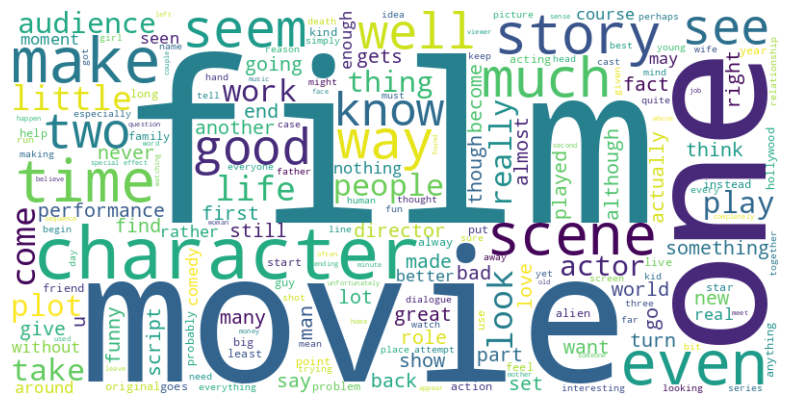

In [ ]:
# Load the movie_reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to ensure randomness
random.shuffle(documents)

def preprocess(words):
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess the documents
processed_documents = [(preprocess(words), category) for words, category in documents]

# Create a combined text of all processed words
all_words = [word for words, category in processed_documents for word in words]
all_words_text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
## End of Script